In [1]:
import pandas as pd
import numpy as np

import sklearn 

from numpy import mean
from numpy import std

from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)

In [3]:
# Basic Dummified Dataset for Linear Models
base = pd.read_csv('../Data/BaseData.csv')
base.shape

(2580, 298)

In [4]:
#base

In [5]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [6]:
X = base['GrLivArea'].values.reshape(-1,1)
y = base.SalePrice.values.reshape(-1,1)
simple1 = linear_model.LinearRegression()
SLR1 = evaluate_model(simple1, X, y)[['test_score']]
SLR1 = SLR1.rename(columns={'test_score':'SLR (Area)'})
SLR1

,SLR (Area)
0,0.492545
1,0.500684
2,0.530382
3,0.553000
4,0.509211
5,0.503816
6,0.569944
7,0.515928
8,0.493042
9,0.505414


In [7]:
X = base['OverallQual'].values.reshape(-1,1)
y = base.SalePrice.values.reshape(-1,1)
simple2 = linear_model.LinearRegression()
SLR2 = evaluate_model(simple2, X, y)[['test_score']]
SLR2 = SLR2.rename(columns={'test_score':'SLR (Quality)'})
SLR2

,SLR (Quality)
0,0.601363
1,0.604992
2,0.631919
3,0.612772
4,0.664951
5,0.620319
6,0.654626
7,0.612257
8,0.645844
9,0.592861


In [8]:
X = base[['GrLivArea','OverallQual']].values
y = base.SalePrice.values.reshape(-1,1)
mlr = linear_model.LinearRegression()
MLR = evaluate_model(mlr, X, y)[['test_score']]
MLR = MLR.rename(columns={'test_score':'MLR (Area & Quality)'})
MLR

,MLR (Area & Quality)
0,0.721532
1,0.714287
2,0.736684
3,0.755845
4,0.751330
5,0.724462
6,0.782182
7,0.724543
8,0.747638
9,0.708893


In [9]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
# list of penalized regression models to evaluate

def get_models():
    models = dict()
    models['ridge'] = Ridge() 
    models['lasso'] = Lasso() 
    models['elastic_net'] = ElasticNet()
    return models


In [11]:
models = get_models()

In [12]:
#Create List of Dictionaries to evalute models

dfs = list()

for name, model in models.items():
    
    # evaluate the model
    df = evaluate_model(model, X, y)
    dfs.append(df)

In [13]:
#dfs

In [14]:
ridge_df = dfs[0][['test_score']]
ridge_df = ridge_df.rename(columns = {'test_score':'Ridge'})
ridge_df

,Ridge
0,0.906132
1,0.858186
2,0.776873
3,0.921208
4,0.943573
5,0.916243
6,0.883911
7,0.924162
8,0.926505
9,0.867633


In [15]:
lasso_df = dfs[1][['test_score']]
lasso_df = lasso_df.rename(columns = {'test_score':'Lasso'})
lasso_df

,Lasso
0,0.910384
1,0.858097
2,0.776695
3,0.921014
4,0.943476
5,0.913753
6,0.883419
7,0.925780
8,0.926305
9,0.867655


In [16]:
elastic_df = dfs[2][['test_score']]
elastic_df = elastic_df.rename(columns = {'test_score':'ElasticNet'})
elastic_df

,ElasticNet
0,0.896418
1,0.846425
2,0.853683
3,0.892887
4,0.922612
5,0.908357
6,0.880169
7,0.904719
8,0.905795
9,0.848192


In [17]:
ordinal = pd.read_csv('../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [18]:
ordinal.head(2)

,Unnamed: 0,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,GarageType,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,MoSold,YrSold,GrLivArea,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,0,3,3,3,3,3,3,8,4,1,3,3,0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,1.0,3.0,5.0,6.0,1.0,1.0,3.0,5.0,2.0,4.0,1.0,9.0,4.0,6.0,5.0,4.0,856,126000,7890,6,6,1939,1950,856,0,0,1,0,2,1,4,1,0,0,0,0,166,0,0,68.516053,0.0,238.0,0.0,618.0,856.0,1.0,0.0,1939.0,2.0,399.0
1,1,4,3,4,3,3,4,8,0,3,3,3,0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,3.0,1.0,2.0,4.0,1.0,9.0,4.0,0.0,4.0,3.0,1049,139500,4235,5,5,1984,1984,1049,0,0,2,0,2,1,5,0,0,105,0,0,0,0,0,42.000000,149.0,552.0,393.0,104.0,1049.0,1.0,0.0,1984.0,1.0,266.0


In [19]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [20]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

rf = RandomForestRegressor(bootstrap=True) 

RF = evaluate_model(rf, X, y)[['test_score']]
RF = RF.rename(columns={'test_score':'Random Forest'})
RF

,Random Forest
0,0.899027
1,0.858654
2,0.898297
3,0.876531
4,0.917372
5,0.892191
6,0.906220
7,0.890443
8,0.913134
9,0.856471


In [21]:
def get_models_2():
    models = dict()
    models['gradient boost'] = GradientBoostingRegressor()
    models['Xtreme GB'] = XGBRegressor()
    models['CatBoost'] = CatBoostRegressor(verbose=False)
    return models

In [22]:
models2 = get_models_2()

In [23]:
#Create List of Dictionaries to evalute models

dfs2 = list()

for name, model in models2.items():
    
    # evaluate the model
    df = evaluate_model(model, X, y)
    dfs2.append(df)

In [24]:
#dfs2

In [25]:
gb = dfs2[0][['test_score']]
gb = gb.rename(columns = {'test_score':'Gradient Boost'})
gb

,Gradient Boost
0,0.915296
1,0.831819
2,0.918093
3,0.911083
4,0.933094
5,0.909804
6,0.928201
7,0.905506
8,0.931179
9,0.839229


In [26]:
xgb = dfs2[1][['test_score']]
xgb = xgb.rename(columns = {'test_score':'XGB'})
xgb

,XGB
0,0.904162
1,0.829442
2,0.913540
3,0.890408
4,0.922078
5,0.889383
6,0.912691
7,0.897548
8,0.922675
9,0.841785


In [27]:
cb = dfs2[2][['test_score']]
cb = cb.rename(columns = {'test_score':'CatBoost'})
cb

,CatBoost
0,0.926457
1,0.902353
2,0.935233
3,0.929956
4,0.948118
5,0.936021
6,0.944510
7,0.922645
8,0.945339
9,0.880212


In [28]:
combo = pd.concat([SLR1, SLR2, MLR, elastic_df, RF, ridge_df, lasso_df, xgb, gb, cb], axis=1)
combo

,SLR (Area),SLR (Quality),MLR (Area & Quality),ElasticNet,Random Forest,Ridge,Lasso,XGB,Gradient Boost,CatBoost
0,0.492545,0.601363,0.721532,0.896418,0.899027,0.906132,0.910384,0.904162,0.915296,0.926457
1,0.500684,0.604992,0.714287,0.846425,0.858654,0.858186,0.858097,0.829442,0.831819,0.902353
2,0.530382,0.631919,0.736684,0.853683,0.898297,0.776873,0.776695,0.913540,0.918093,0.935233
3,0.553000,0.612772,0.755845,0.892887,0.876531,0.921208,0.921014,0.890408,0.911083,0.929956
4,0.509211,0.664951,0.751330,0.922612,0.917372,0.943573,0.943476,0.922078,0.933094,0.948118
5,0.503816,0.620319,0.724462,0.908357,0.892191,0.916243,0.913753,0.889383,0.909804,0.936021
6,0.569944,0.654626,0.782182,0.880169,0.906220,0.883911,0.883419,0.912691,0.928201,0.944510
7,0.515928,0.612257,0.724543,0.904719,0.890443,0.924162,0.925780,0.897548,0.905506,0.922645
8,0.493042,0.645844,0.747638,0.905795,0.913134,0.926505,0.926305,0.922675,0.931179,0.945339
9,0.505414,0.592861,0.708893,0.848192,0.856471,0.867633,0.867655,0.841785,0.839229,0.880212


In [29]:
g4, g7, g9 = sns.color_palette("muted", 3)

In [30]:
sns.color_palette("muted", 3)

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803)]

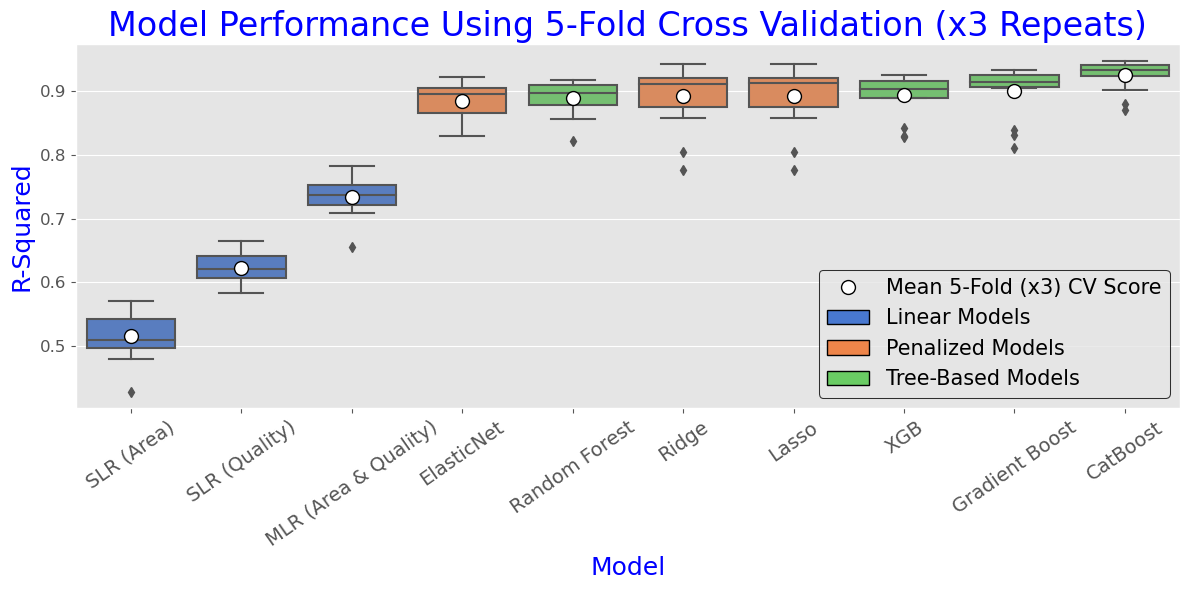

In [31]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0],[0], marker='o', markersize=10, color='w', lw=0, markeredgecolor='black', label='Mean 5-Fold (x3) CV Score'),
                   Patch(facecolor=g4, edgecolor='black', label='Linear Models'),
                   Patch(facecolor=g7, edgecolor='black', label='Penalized Models'),
                   Patch(facecolor=g9, edgecolor='black', label='Tree-Based Models')]

plt.style.use('default')
plt.style.use('ggplot')

plt.figure(figsize=(12,6))

my_pal = {"SLR (Area)":g4, "SLR (Quality)":g4, "MLR (Area & Quality)":g4,
         "Ridge":g7, "Lasso":g7, "ElasticNet":g7,
         "Random Forest":g9, "Gradient Boost": g9, "XGB":g9, "CatBoost":g9}

ax = sns.boxplot(data=combo, showmeans=True,
                        meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"}, palette=my_pal)

leg = ax.legend(handles=legend_elements, loc='lower right', fontsize=15)
leg.get_frame().set_linewidth(0.75)
leg.get_frame().set_edgecolor('black')

plt.xticks(rotation=35, fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('R-Squared', fontsize=18, color='blue')
plt.xlabel('Model', fontsize=18, color='blue')

plt.title('Model Performance Using 5-Fold Cross Validation (x3 Repeats)', fontsize=24, color='blue')

#colors = [g4, g4, g4, g7, g7, g7, g9, g9, g9, g9]
#for xtick, color in zip(ax.get_xticklabels(), colors):
#    xtick.set_color(color)

plt.tight_layout();

In [32]:
combo.describe()

,SLR (Area),SLR (Quality),MLR (Area & Quality),ElasticNet,Random Forest,Ridge,Lasso,XGB,Gradient Boost,CatBoost
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.515395,0.622983,0.734588,0.885337,0.889707,0.892411,0.892750,0.894167,0.901135,0.925691
std,0.037207,0.023780,0.030715,0.027831,0.026710,0.047243,0.047501,0.033706,0.039510,0.023365
min,0.428189,0.582898,0.654818,0.829967,0.822603,0.776873,0.776695,0.827769,0.811596,0.871441
25%,0.496863,0.606316,0.720893,0.866926,0.878680,0.875772,0.875537,0.889896,0.907082,0.923539
50%,0.509211,0.620319,0.736684,0.896418,0.898297,0.911361,0.913753,0.904162,0.915296,0.934365
75%,0.541691,0.641334,0.753587,0.905257,0.909833,0.921206,0.921137,0.917206,0.925398,0.942142
max,0.569944,0.664951,0.782182,0.922612,0.917372,0.943573,0.943476,0.925354,0.934486,0.948118
